In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

### imports necessary Python libraries and reads in the dataset files for training and testing as Pandas dataframes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


train_set = pd.read_csv('/content/Data/train.csv', header = 0)
test_set = pd.read_csv('/content/Data/test.csv', header = 0)

In [3]:
#print the head of data in the training set
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#print the head of data in the test set
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print('Test set shape:', test_set.shape)
print('Train set shape:', train_set.shape)

Test set shape: (4277, 13)
Train set shape: (8693, 14)


In [6]:
#prints data types for various features
train_set.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
#prints number of unique values
train_set.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Create a set of historgrams for each numerical column in a dataset, displaying the distribution of values based on the Transported status.

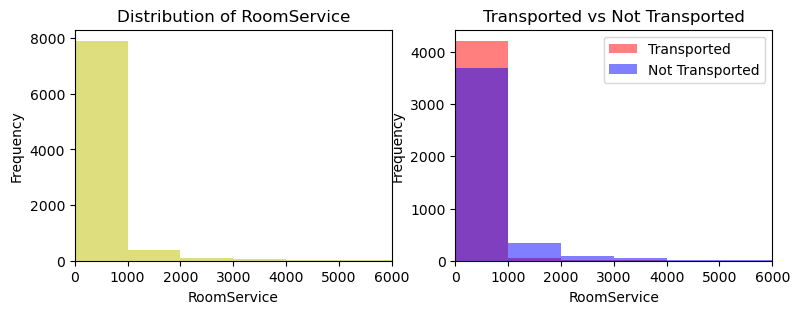

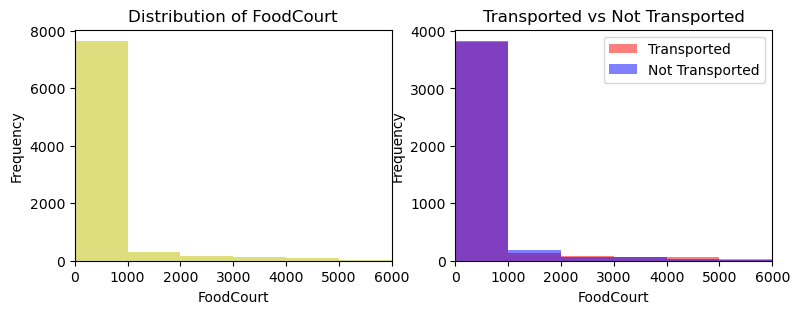

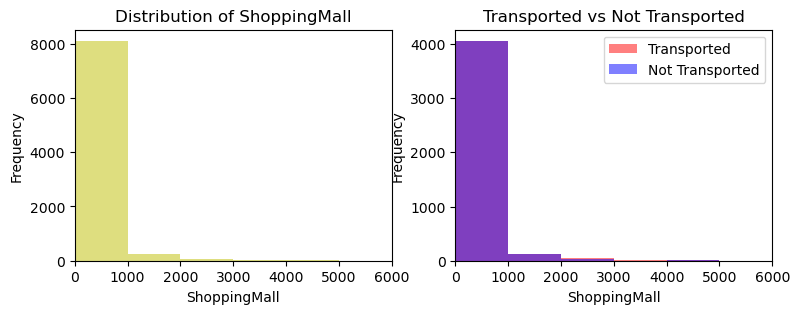

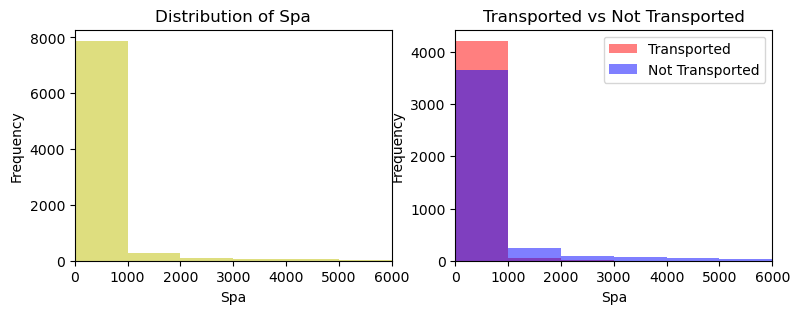

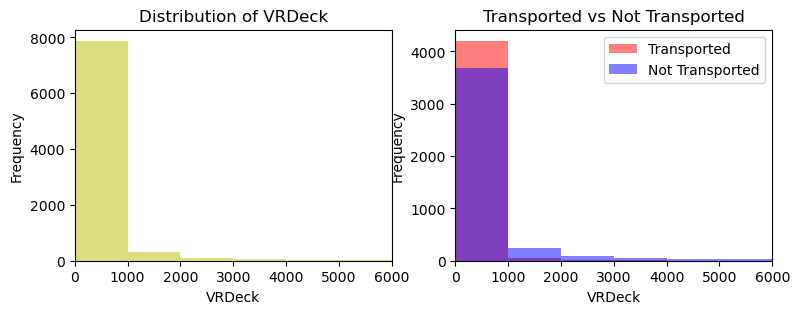

In [ ]:
num_cols = train_set.select_dtypes('number').drop('Age', axis=1).columns

for num_col in num_cols:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
    
    axs[0].hist(train_set[num_col], bins=20, color='y', alpha=0.5, range=(0, 20000))
    axs[0].set_xlabel(num_col)
    axs[0].set_ylabel('Frequency')
    axs[0].set_xlim([0, 6000])
    axs[0].set_title('Distribution of ' + num_col)
    
    axs[1].hist(train_set.loc[train_set['Transported']==1, num_col], bins=20, color='r', alpha=0.5, label='Transported', range=(0, 20000))
    axs[1].hist(train_set.loc[train_set['Transported']==0, num_col], bins=20, color='b', alpha=0.5, label='Not Transported', range=(0, 20000))
    axs[1].set_xlabel(num_col)
    axs[1].set_ylabel('Frequency')
    axs[1].legend(loc='best')
    axs[1].set_xlim([0, 6000])
    axs[1].set_title('Transported vs Not Transported')

    plt.show()

### 

### Creates a heatmap visualization of the Pearson correlation matrix between numerical features in the training set data.

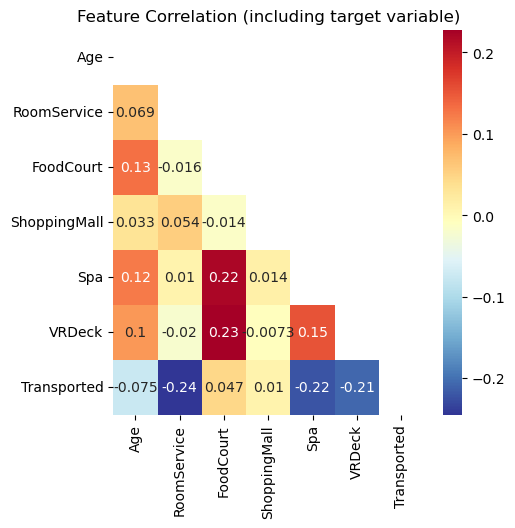

In [ ]:
plt.figure(figsize=(5, 5))

# Select numerical features and target variable
numerical_cols = train_set.select_dtypes(include=['float64', 'int64']).columns
target_col = 'Transported'
cols_to_use = numerical_cols.append(pd.Index([target_col]))
df_corr = train_set[cols_to_use].corr()

#  hide the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Plot the correlation matrix heatmap
sns.heatmap(df_corr, annot=True, mask=mask, cmap='RdYlBu_r')

# Set the title and show the plot
plt.title('Feature Correlation (including target variable)')
plt.show()

In [ ]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


###  Creates count plots for specified columns in the train set to show the distribution of transported passengers for each category in the column.

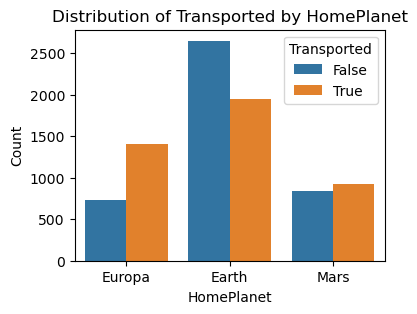

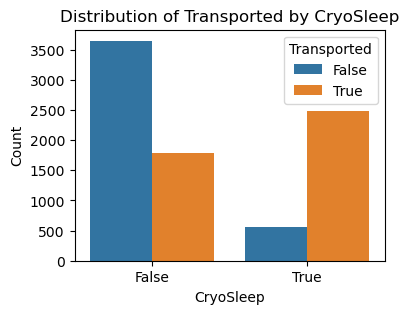

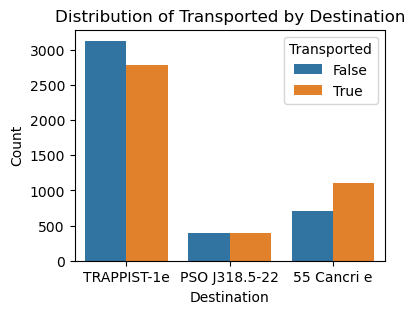

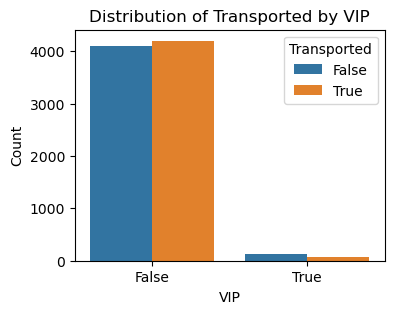

In [ ]:
count_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in count_cols:
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.countplot(data=train_set, x=col, hue='Transported', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Transported by ' + col)
    plt.show()

# Displays a table of all missing values

In [ ]:
missing_values = test_set.apply(lambda x: x.isna().sum())
percent_missing = test_set.apply(lambda x: x.isna().sum()*100/len(test_set.VIP))
pd.DataFrame({'missing': missing_values, '% missing': percent_missing})

,missing,% missing
PassengerId,0,0.000000
HomePlanet,87,2.034136
CryoSleep,93,2.174421
Cabin,100,2.338087
Destination,92,2.151040
Age,91,2.127660
VIP,93,2.174421
RoomService,82,1.917232
FoodCourt,106,2.478373
ShoppingMall,98,2.291326


###  Reads the train dataset, fills in missing values, creates new features, drops certain features, and returns a cleaned dataset.

In [ ]:
train_set_path = "/kaggle/input/spaceship-titanic/train.csv"
curr_dataset = pd.read_csv(train_set_path)
curr_dataset.head()


def clean_data(df: pd.DataFrame):
    
    df = df.fillna({
        "Destination": "TRAPPIST-1e",
        "HomePlanet": "Earth",
        "Cabin_1": "F",
        "Cabin_2": "S",
        "Age": df["Age"].median(),
        "RoomService": df["RoomService"].median(),
        "FoodCourt": df["FoodCourt"].median(),
        "ShoppingMall": df["ShoppingMall"].median(),
        "Spa": df["Spa"].median(),
        "VRDeck": df["VRDeck"].median(),
        "VIP": False,
        "CryoSleep": False
    })
    
     #Create new features
    df["Cabin_1"] = df.Cabin.str.split("/").str[0]
    df["Cabin_2"] = df.Cabin.str.split("/").str[2]
    df["Spent"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
    
    #drop certain features
    df = df.drop("PassengerId", axis=1)
    df = df.drop("Name", axis=1)
    df = df.drop("Cabin", axis=1)
    return df


cleaned_dataset = clean_data(curr_dataset)
cleaned_dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Spent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0


### Encodes categorical columns in a Pandas DataFrame by creating dummy variables for each unique category and dropping the original categorical column.

In [ ]:

def encode_data(df: pd.DataFrame):
    df_encoded = pd.get_dummies(df, columns=['HomePlanet', 'Destination', "Cabin_1", "Cabin_2"], drop_first=True)
    
    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object':
            unique_values = df_encoded[column].unique()
            for value in unique_values:
                new_col_name = f"{column}_{value}"
                df_encoded[new_col_name] = (df_encoded[column] == value).astype(float)
            df_encoded = df_encoded.drop(column, axis=1)
        else:
            df_encoded[column] = df_encoded[column].astype(float)
            
    return df_encoded



encoded_dataset = encode_data(cleaned_dataset)
encoded_dataset.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spent,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_2_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,736.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,10383.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,5176.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1091.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Normalizes the dataset using the Normalizer() function by fitting and transforming the dataset after dropping the "Transported" column and saving the result as a new dataframe called dataset_normalized.

In [ ]:
from sklearn.preprocessing import Normalizer

# Initialize the Normalizer object
normalizer = Normalizer()

# Drop the "Transported" column from the encoded dataset
dataset_encoded_drop = encoded_dataset.drop(["Transported"], axis=1)

# Fit the Normalizer object on the encoded dataset
normalizer.fit(dataset_encoded_drop)

# Apply the Normalizer transformation on the encoded dataset
dataset_normalized = pd.DataFrame(normalizer.transform(dataset_encoded_drop), columns=dataset_encoded_drop.columns)

Normalizer()
X = dataset_encoded_drop
normalizer.fit(X)
X_normalized = normalizer.transform(X)
y = encoded_dataset.Transported.values

### Train/Test/Split with a test size of .2 and a random state of 69

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = .2, random_state = 69)

### Imports needed libraries

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


### K Nearest Neighbors Classifier Tuning

Best hyperparameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Best accuracy:  0.7893300715286864
KNN Training Confusion Matrix:


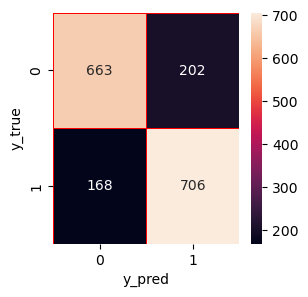

In [ ]:
# Define the range of hyperparameters to search
param_grid = {
              "n_neighbors": [3, 5, 7, 9, 11],
              "weights": ["uniform", "distance"]
             }

# Create a grid search object and fit it to the training data
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
KNN_ACC = grid_search.best_score_
print("Best accuracy: ", KNN_ACC)

# Use the best hyperparameters to train and evaluate the model on the validation data
KNN = KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"], 
                                  weights=grid_search.best_params_["weights"])
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

print("KNN Training Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Decision Tree Classifier hyper parameter Tuning

Best Hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 4}
Best Accuracy Score: 0.7916319194823869
Decision Tree Training Confusion Matrix:


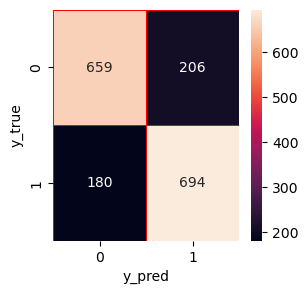

In [ ]:
# Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7, 9, 11, None],
    "min_samples_split": [2, 4, 6, 8, 10, 12],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],
    "max_features": ["sqrt", "log2", None]
}


# Create a Decision Tree Classifier
DTC = DecisionTreeClassifier()

# Perform a GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(DTC, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters:", grid_search.best_params_)
DTC_ACC = grid_search.best_score_
print("Best Accuracy Score:", DTC_ACC)

# Use the best hyperparameters to train the model
DTC = DecisionTreeClassifier(**grid_search.best_params_)
DTC.fit(X_train,y_train)

y_pred = DTC.predict(X_test)
print("Decision Tree Training Confusion Matrix:")

cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### Gradient Boosting Classifier hyper parameter Tuning

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score: 0.8070175692659388
Gradient Boosting Training Confusion Matrix:


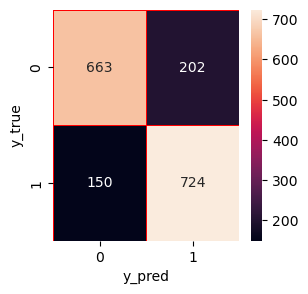

In [ ]:
# Define the hyperparameter grid
param_grid = {
    "learning_rate": [0.1, 0.01],
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2", None]
}

# Create a Gradient Boosting Classifier
GBC = GradientBoostingClassifier()

# Perform a GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(GBC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters:", grid_search.best_params_)
GBC_ACC = grid_search.best_score_
print("Best Accuracy Score:", GBC_ACC)

# Use the best hyperparameters to train the model
GBC = GradientBoostingClassifier(**grid_search.best_params_)
GBC.fit(X_train,y_train)

y_pred = GBC.predict(X_test)
print("Gradient Boosting Training Confusion Matrix:")

cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### Random Forest Classifier hyper parameter Tuning

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Best Accuracy Score: 0.8016966211358735
Random Forest Training Confusion Matrix:


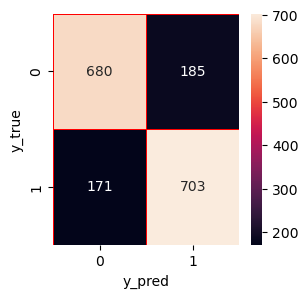

In [ ]:
# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", None]
}

# Create a Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Perform a GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(RFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
RFC_ACC = grid_search.best_score_
print("Best Accuracy Score:", RFC_ACC)

# Use the best hyperparameters to train the model
RFC = RandomForestClassifier(**grid_search.best_params_, random_state=42)
RFC.fit(X_train,y_train)

y_pred = RFC.predict(X_test)
print("Random Forest Training Confusion Matrix:")

cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### Plots a bar chart showing the accuracy scores of different machine learning models, with the best performing model highlighted in red.

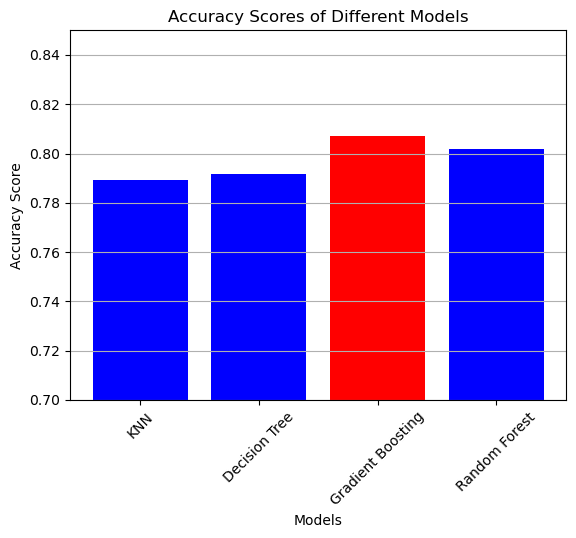

In [ ]:
import matplotlib.pyplot as plt

models = ["KNN","Decision Tree","Gradient Boosting","Random Forest"]

accuracy_scores = [KNN_ACC,DTC_ACC,GBC_ACC,RFC_ACC]


plt.ylim(.70, .85)
# Plot the bar chart with rotated x-axis labels and grid lines
bar_colors = ["blue"]*len(models)
best_model_idx = accuracy_scores.index(max(accuracy_scores))
bar_colors[best_model_idx] = "red"

plt.bar(models, accuracy_scores, color=bar_colors)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title("Accuracy Scores of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# Display the plot
plt.show()



### Make predictions, convert to binary, save as submission.

In [ ]:
test_set_path = "/kaggle/input/spaceship-titanic/test.csv"
test_dataset = pd.read_csv(test_set_path)

test_dataset_cleaned = clean_data(test_dataset)
test_dataset_encoded = encode_data(test_dataset_cleaned)

predictions = GBC.predict(normalizer.transform(test_dataset_encoded))
reshaped_preds = predictions.reshape(-1)
predicted_transport = (reshaped_preds > 0.5)

submission = pd.DataFrame({"PassengerId": test_dataset["PassengerId"], "Transported": predicted_transport})
submission['Transported'] = submission['Transported'].apply(lambda x: 'True' if x else 'False')
submission.to_csv("submission.csv", index=False)